# A general approach to building a convolutional neural network using the Fashion-MNIST dataset

### Packages required:
- pytorch
2. torchvision
3. matplotlib
4. numpy

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable
import matplotlib.pyplot as plt

### Building the preliminary training and test datasets

In [2]:
train_dataset=dsets.FashionMNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)
test_dataset=dsets.FashionMNIST(root='./data',train=False,transform=transforms.ToTensor())

#### The size of the entire training dataset

In [3]:
train_dataset.train_data.size()

torch.Size([60000, 28, 28])

#### Printing an example of the 28x28 image and it's label

Label: 9


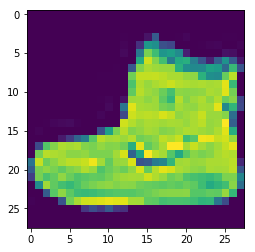

In [4]:
print("Label: {}".format(train_dataset.train_labels[0]))
plt.imshow(train_dataset.train_data[0])

### Starting to build the neural net 

In [5]:
# We use a batch size of 100 i.e 100 images are processed in a single iteration
batch_size=100

In [6]:
# Total no. pf iterations will be 3000
n_iters=3000

In [7]:
num_epochs=int(n_iters/(len(train_dataset)/batch_size)) #Total 5 epochs overall

#### Converting the datasets to an iterable format 

In [8]:
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_loader=torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)

#### Building the model class

In [9]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel,self).__init__()
        
        #Convolution 1
        self.cnn1=nn.Conv2d(in_channels=1,out_channels=16,kernel_size=5,stride=1,padding=2) #Using SAME padding
        self.relu1=nn.ReLU()
        
        #Maxpool 1
        self.maxpool1=nn.MaxPool2d(kernel_size=2)
        
        #Convolution 2
        self.cnn2=nn.Conv2d(in_channels=16,out_channels=32,kernel_size=5,stride=1,padding=2)
        self.relu2=nn.ReLU()
        
        #Maxpool 2
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        
        self.fc1=nn.Linear(32*7*7,10) #Input size:32kernels*7x7 image, Output:10
        
    def forward(self,x):
        out=self.cnn1(x)
        out=self.relu1(out)

        out=self.maxpool1(out)

        out=self.cnn2(out)
        out=self.relu2(out)

        out=self.maxpool2(out)

        #Resizing
        out=out.view(out.size(0),-1)
        out=self.fc1(out)
        return out

#### Instantiating model class

In [10]:
model=CNNModel()

#### Instantiating loss function
We use the CrossEntropyLoss for our CNN

In [11]:
criterion=nn.CrossEntropyLoss()

In [12]:
learning_rate=0.01
optimizer=torch.optim.SGD(model.parameters() ,lr=learning_rate)

### Training our CNN 

In [ ]:
iter=0
for epoch in range(num_epochs):
    for i,(images,labels) in enumerate(train_loader):
        images=Variable(images)
        labels=Variable(labels)
        
        optimizer.zero_grad()
        outputs=model(images)
        
        loss=criterion(outputs,labels)
        
        loss.backward()
        
        optimizer.step()
        
        iter+=1
        
        if ((iter%500)==0):
            correct=0
            total=0
            
            for images,labels in test_loader:
                images=Variable(images)
                outputs=model(images)
                
                _,pred=torch.max(outputs.data,1)
                
                total+=labels.size(0)
                correct+=(pred==labels).sum()
                
                accuracy=correct*100/total
                
            print("Iteration{}: Loss{}, Accuracy{}".format(iter,loss.data[0],accuracy))
            


### The model reaches an accuracy of around 80% on the validation dataset. 